In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [2]:
data=pd.read_csv("C:\\Users\\prita\\Downloads\\Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [7]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
data.drop(columns=['isFlaggedFraud'], inplace=True)

In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [11]:
data=data.dropna()

In [12]:
data.duplicated().sum()

0

<Axes: ylabel='count'>

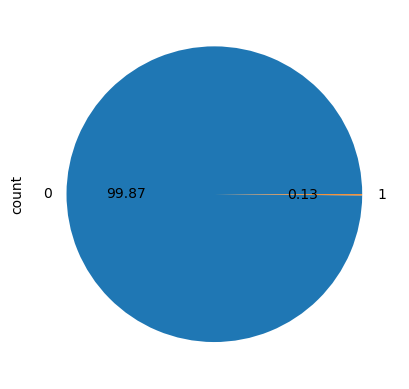

In [13]:
data['isFraud'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

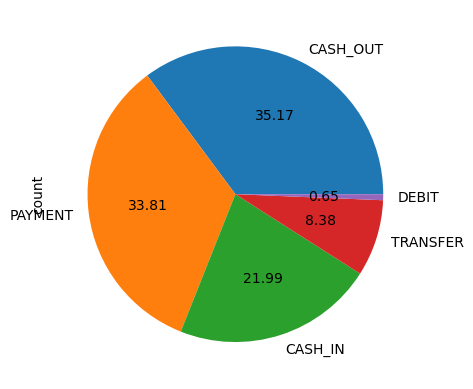

In [14]:
data['type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='isFraud', ylabel='type'>

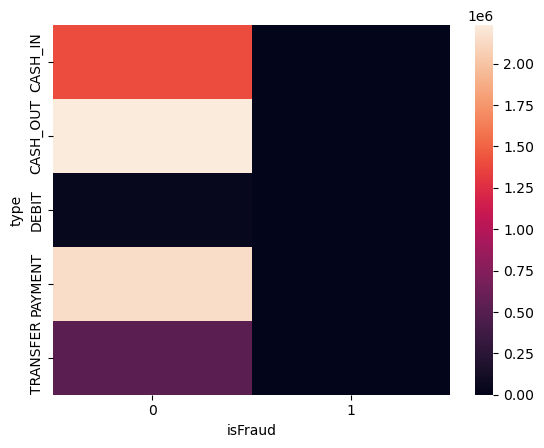

In [15]:
sns.heatmap(pd.crosstab(data['type'],data['isFraud']))

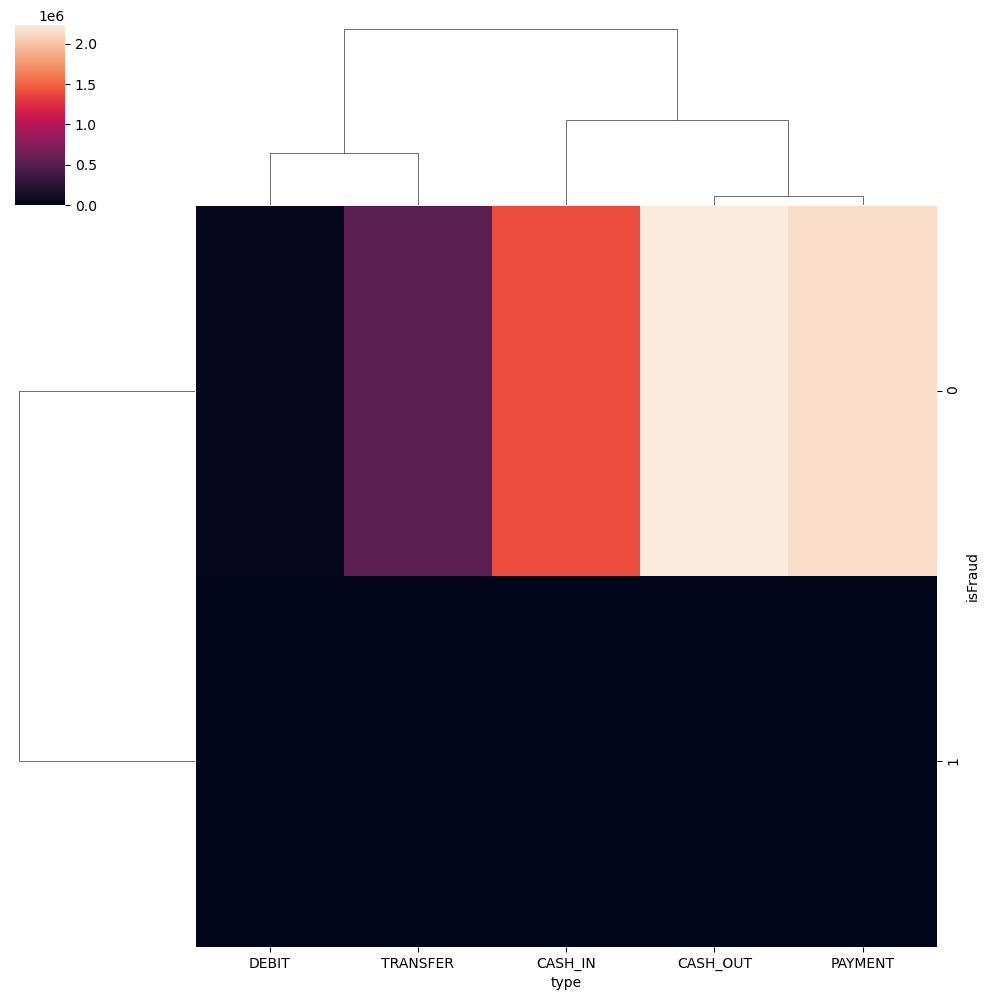

In [16]:
sns.clustermap(pd.crosstab(data['isFraud'],data['type']))

<Axes: xlabel='amount', ylabel='newbalanceOrig'>

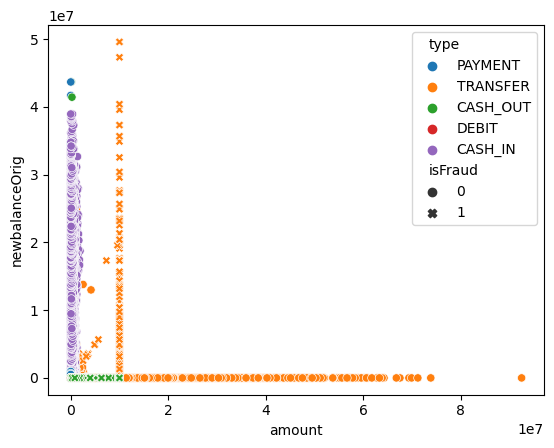

In [17]:
sns.scatterplot(x='amount', y='newbalanceOrig',hue='type',style='isFraud', data=data)

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'data' is your original DataFrame
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(data[['type']]).toarray()

unique_values = data['type'].unique()
new_columns = [f'type_{value}' for value in unique_values]

data_encoded = pd.DataFrame(encoded_array, columns=new_columns)
df = pd.concat([data, data_encoded], axis=1).drop('type', axis=1)

print(df)

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  type_PAYMENT  \
0        M1979787155            0.00        

In [20]:

columns_to_drop = ['step', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
new_df = df.drop(columns=columns_to_drop)


In [21]:
new_df.head()

,amount,isFraud,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN
0,9839.64,0,0.0,0.0,0.0,1.0,0.0
1,1864.28,0,0.0,0.0,0.0,1.0,0.0
2,181.00,1,0.0,0.0,0.0,0.0,1.0
3,181.00,1,0.0,1.0,0.0,0.0,0.0
4,11668.14,0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

amount_column = new_df['amount']

amount_values = amount_column.values.reshape(-1, 1)

scaler = MinMaxScaler()

scaled_amount = scaler.fit_transform(amount_values)

new_df['amount'] = scaled_amount

print(new_df)


           amount  isFraud  type_PAYMENT  type_TRANSFER  type_CASH_OUT  \
0        0.000106        0           0.0            0.0            0.0   
1        0.000020        0           0.0            0.0            0.0   
2        0.000002        1           0.0            0.0            0.0   
3        0.000002        1           0.0            1.0            0.0   
4        0.000126        0           0.0            0.0            0.0   
...           ...      ...           ...            ...            ...   
6362615  0.003674        1           0.0            1.0            0.0   
6362616  0.068272        1           0.0            0.0            0.0   
6362617  0.068272        1           0.0            1.0            0.0   
6362618  0.009195        1           0.0            0.0            0.0   
6362619  0.009195        1           0.0            1.0            0.0   

         type_DEBIT  type_CASH_IN  
0               1.0           0.0  
1               1.0           0.0  
2  

In [23]:
X = new_df.drop(['isFraud'], axis = 1) 
Y = new_df["isFraud"] 
xData = X.values 
yData = Y.values

In [24]:
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split( xData, yData, test_size = 0.2, random_state = 42) 

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=xTrain.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
model.fit(xTrain, yTrain, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


127253/127253 [==============================] - 311s 2ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.0077 - val_accuracy: 0.9987
Epoch 2/10
127253/127253 [==============================] - 386s 3ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0073 - val_accuracy: 0.9989
Epoch 3/10
127253/127253 [==============================] - 415s 3ms/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.0072 - val_accuracy: 0.9989
Epoch 4/10
127253/127253 [==============================] - 412s 3ms/step - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.0072 - val_accuracy: 0.9989
Epoch 5/10
127253/127253 [==============================] - 411s 3ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.0071 - val_accuracy: 0.9989
Epoch 6/10
127253/127253 [==============================] - 404s 3ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.0072 - val_accuracy: 0.9989
Epoch 7/10
127253/127253 [==============================] - 400s 3ms/step - loss: 0.0077 - accurac

In [32]:

y_pred = model.predict(xTest)
y_pred_classes = (y_pred > 0.5).astype(int)

39767/39767 [==============================] - 55s 1ms/step


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(yTest, y_pred_classes))
print(confusion_matrix(yTest, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.11      0.20      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.55      0.60   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270896       8]
 [   1442     178]]
